# Exercise 

Consider the dataset loaded in the following code 

Use superimposed line plots with optimal colormap to compare the trends in gender ratio of 17 U.S. college majors between 1970 and 2011. Create two versions of the plot changing the scales to enhance or to hide variations. 

Use small multiples to present the trend in separate plots. Make sure all of the subplots have the same axes and ranges.

Use small multiples and pie charts to compare gender ratios of business, engineering, biology, Health professions in 1970, 1990 and 2010


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

degree_gender_ratio = pd.read_csv('data/percent-degrees-conferred-women-usa.csv')

degree_gender_ratio.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


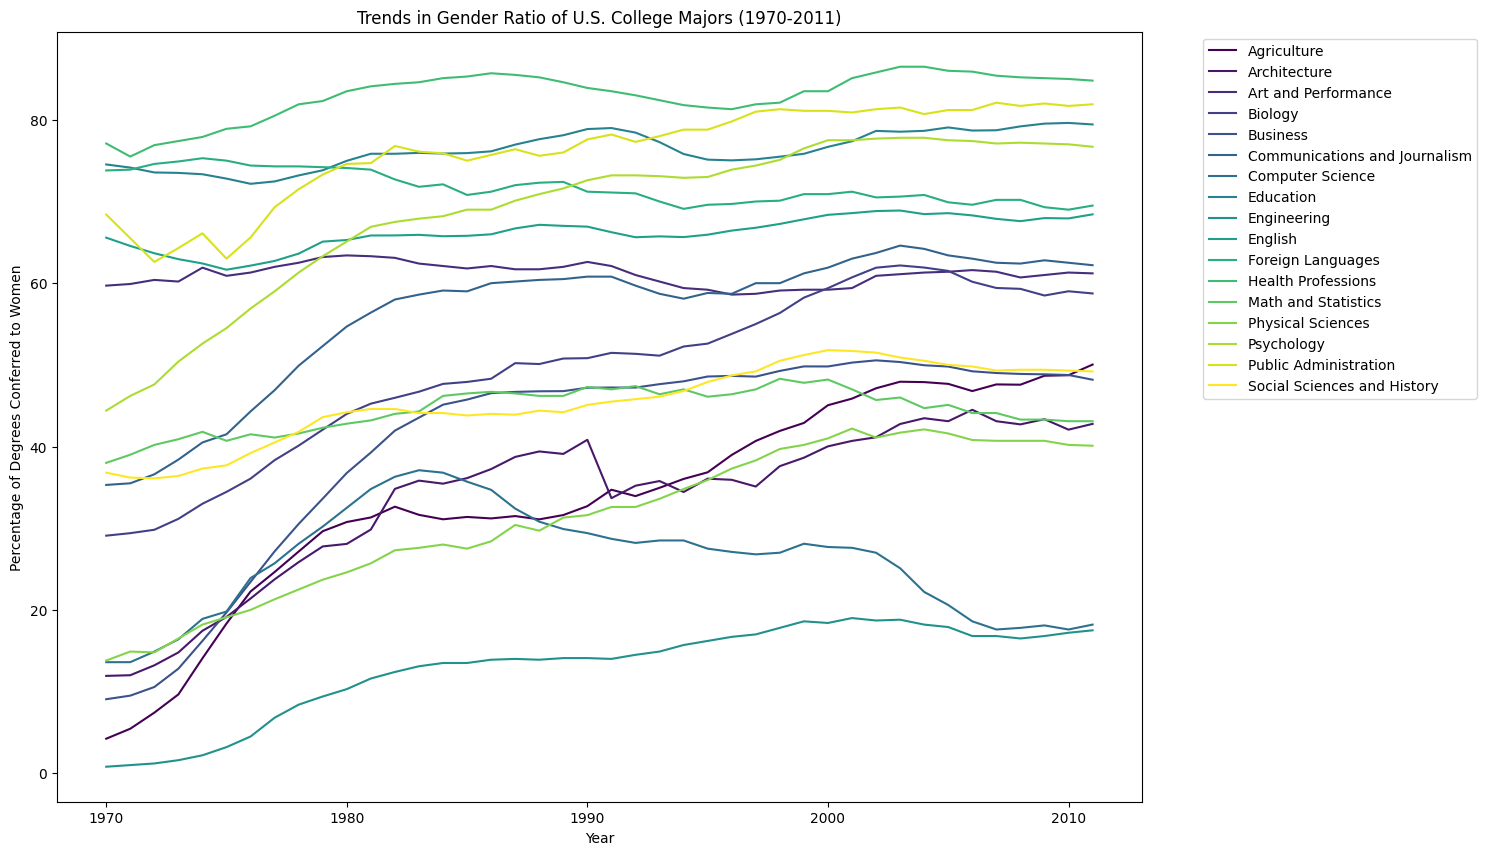

In [14]:
# Use superimposed line plots with optimal colormap to compare the trends in gender ratio of 17 U.S. college majors between 1970 and 2011.

fig, ax = plt.subplots(figsize=(14, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(degree_gender_ratio.columns[1:])))

for i, column in enumerate(degree_gender_ratio.columns[1:]):
    ax.plot(degree_gender_ratio['Year'], degree_gender_ratio[column], label=column, color=colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Degrees Conferred to Women')
ax.set_title('Trends in Gender Ratio of U.S. College Majors (1970-2011)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

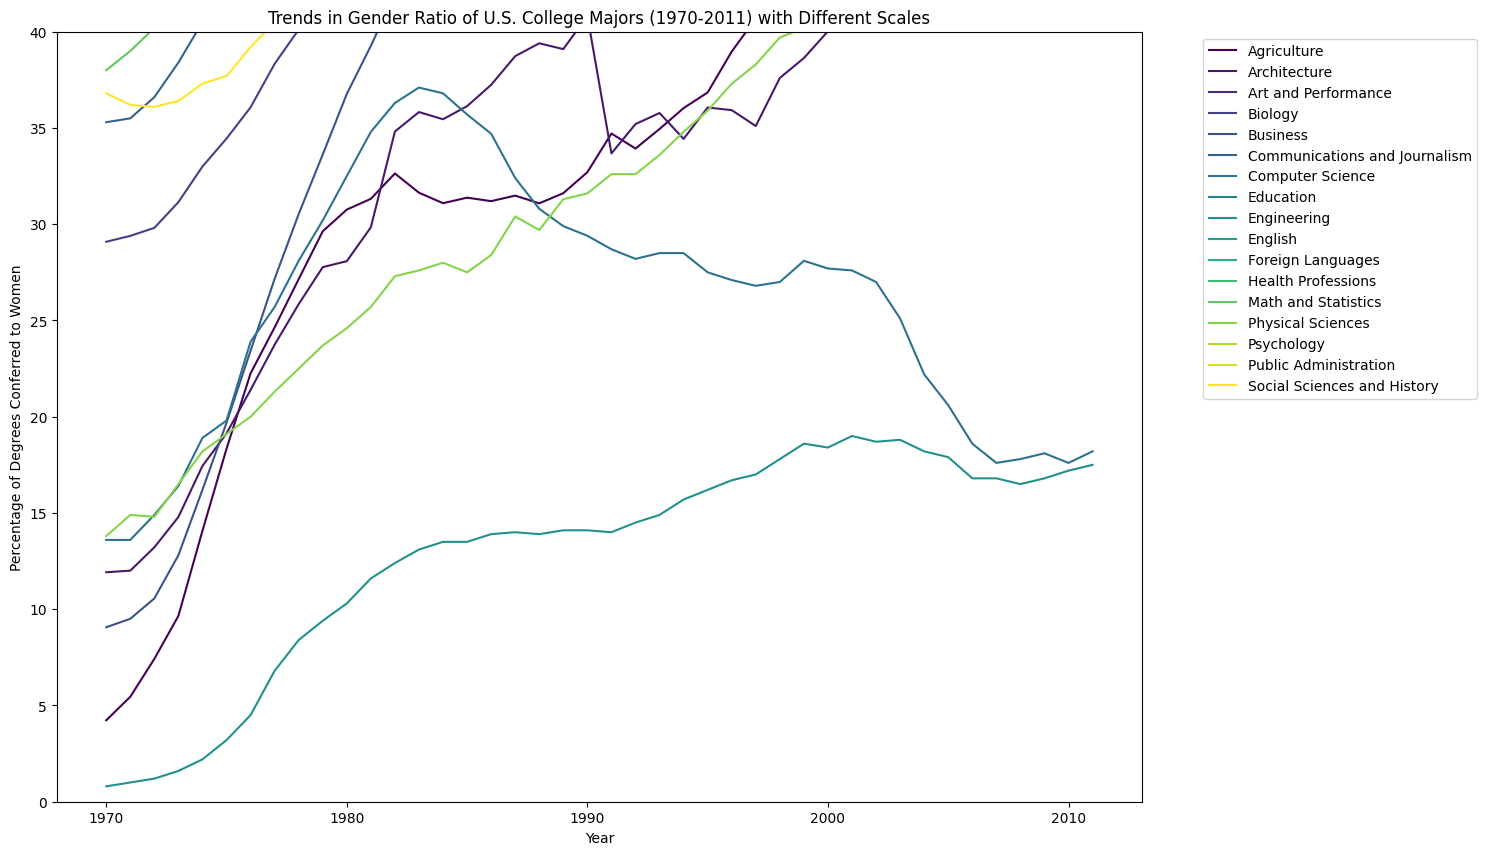

In [ ]:
# Superimposed line plots with different scales -> change the y-axis limits from 0 to 40
fig, ax = plt.subplots(figsize=(14, 10))
for i, column in enumerate(degree_gender_ratio.columns[1:]):
    ax.plot(degree_gender_ratio['Year'], degree_gender_ratio[column], label=column, color=colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Degrees Conferred to Women')
ax.set_title('Trends in Gender Ratio of U.S. College Majors (1970-2011) with Different Scales')
ax.set_ylim(0, 40)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

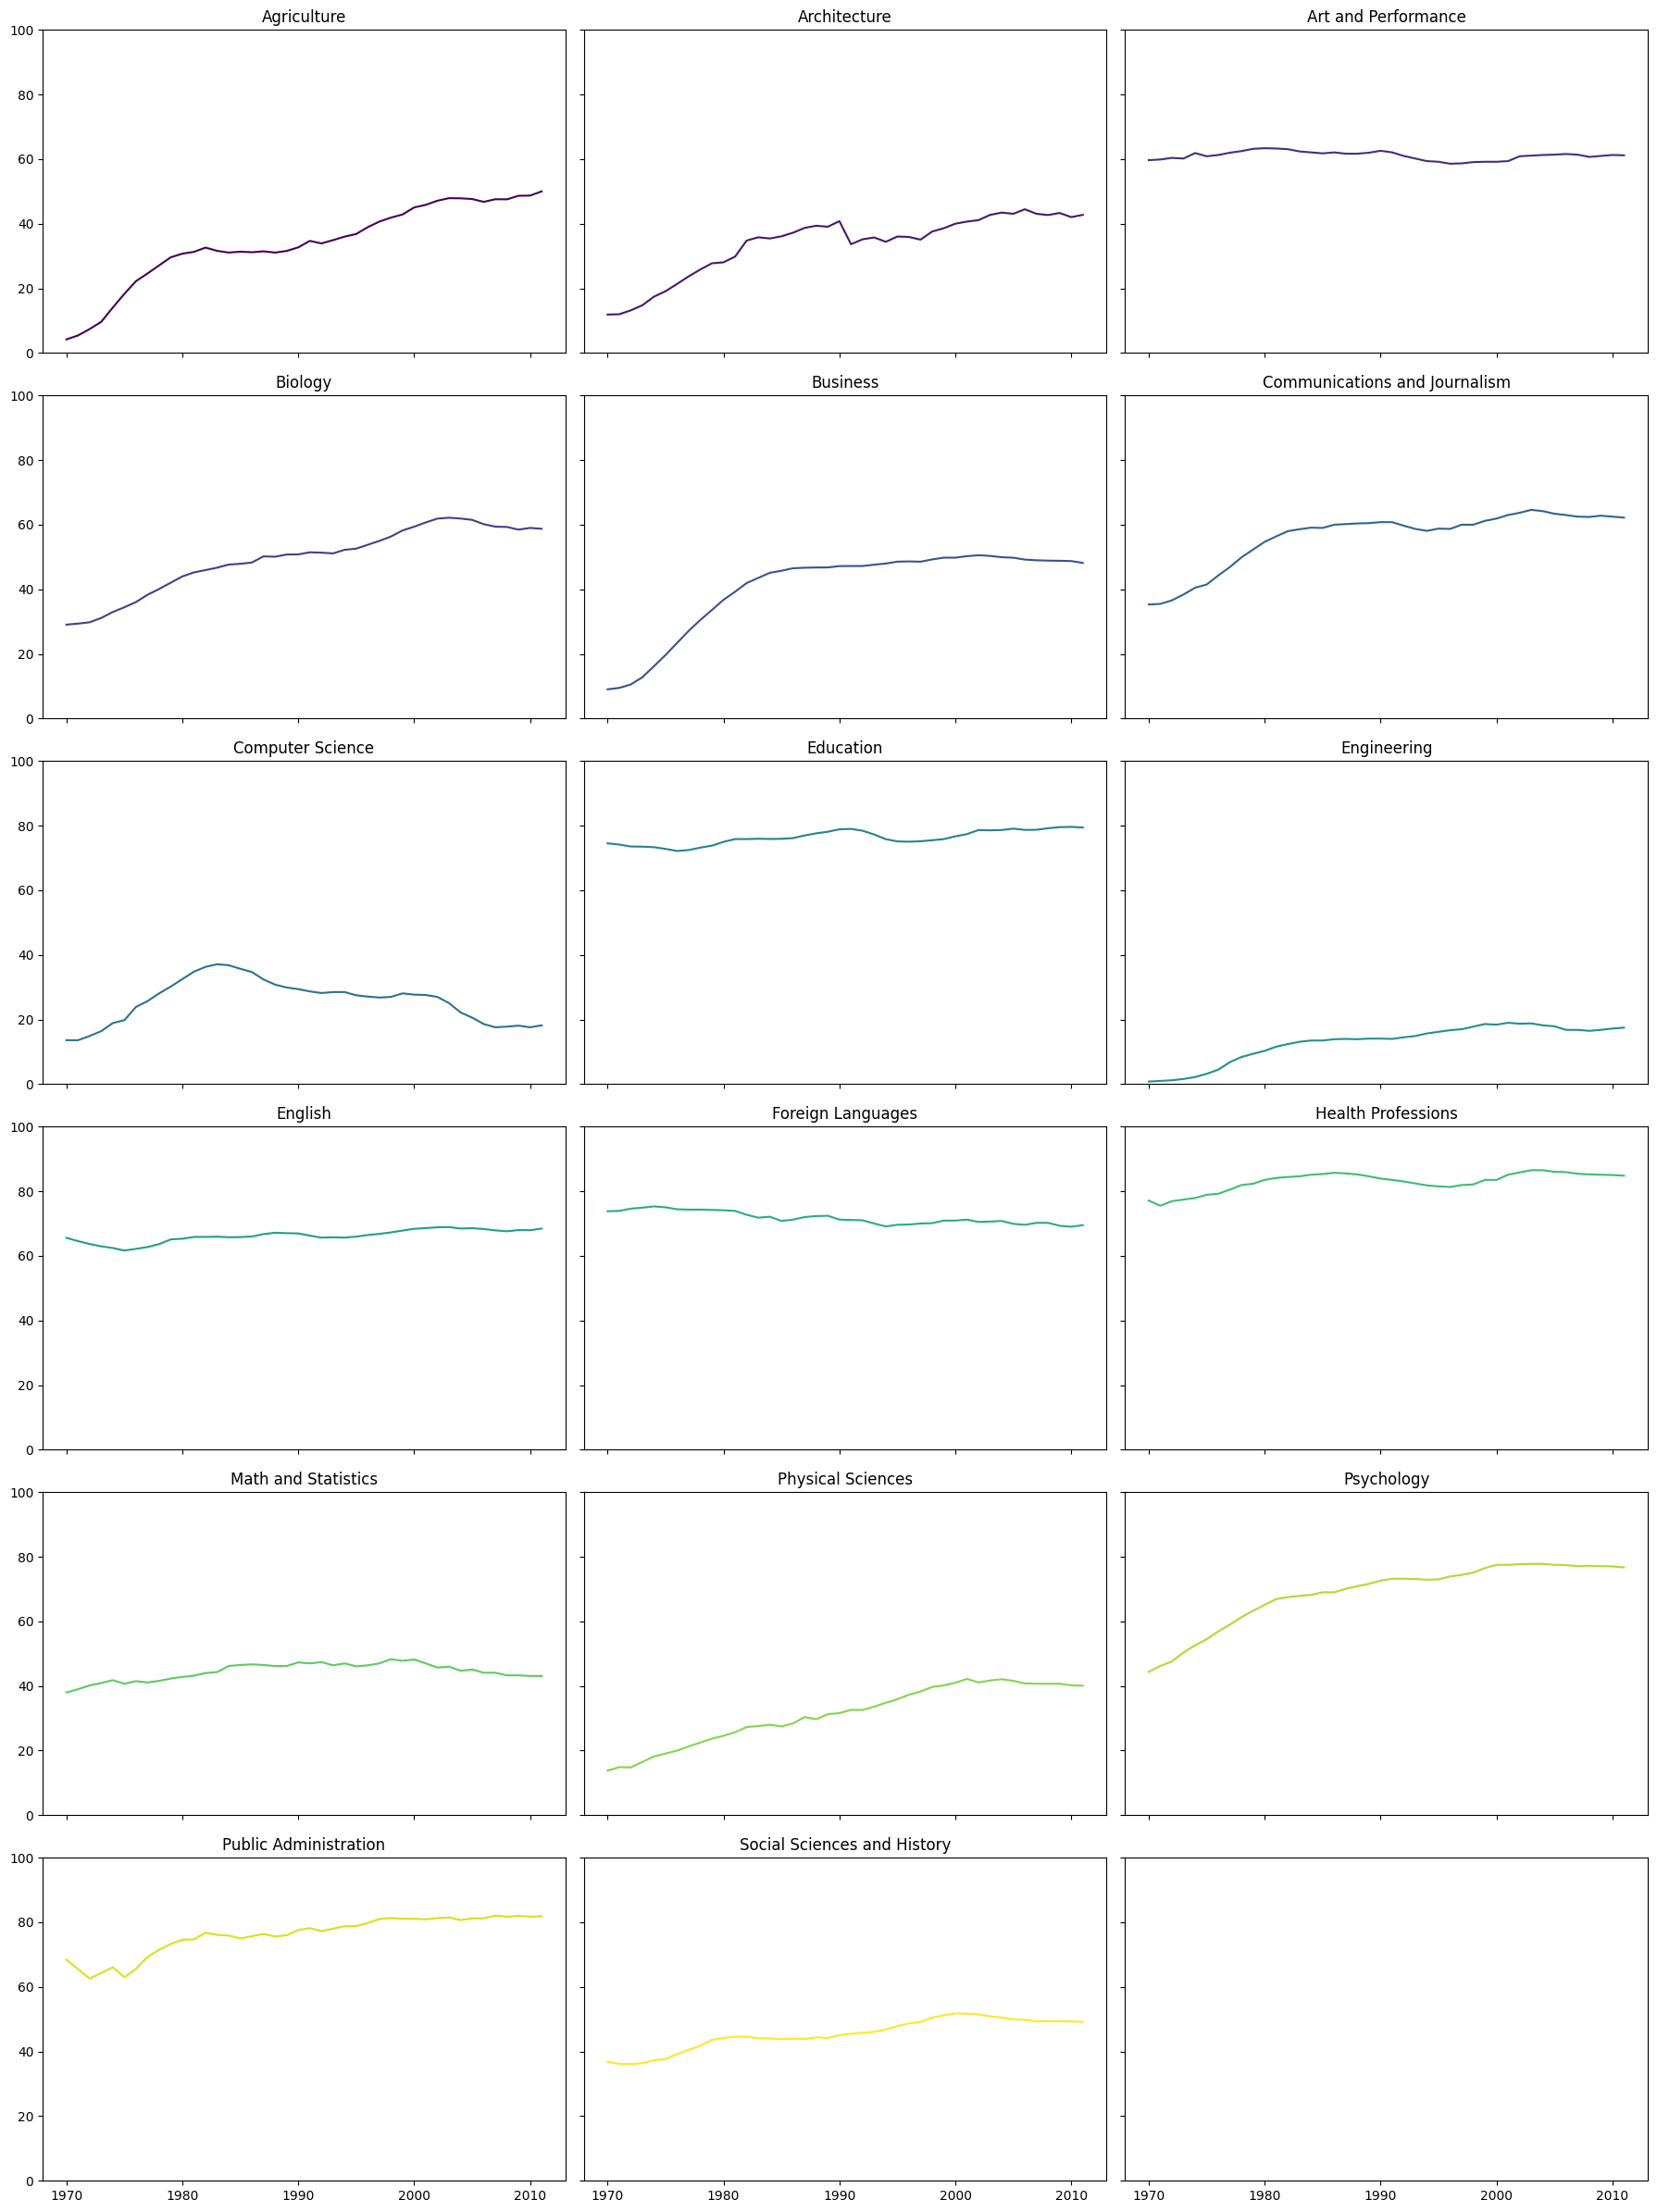

In [16]:
# Small multiples to present the trend in separate plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24), sharex=True, sharey=True)
axes = axes.flatten()

for i, column in enumerate(degree_gender_ratio.columns[1:]):
    axes[i].plot(degree_gender_ratio['Year'], degree_gender_ratio[column], label=column, color=colors[i])
    axes[i].set_title(column)
    axes[i].set_ylim(0, 100)

fig.tight_layout()
plt.show()

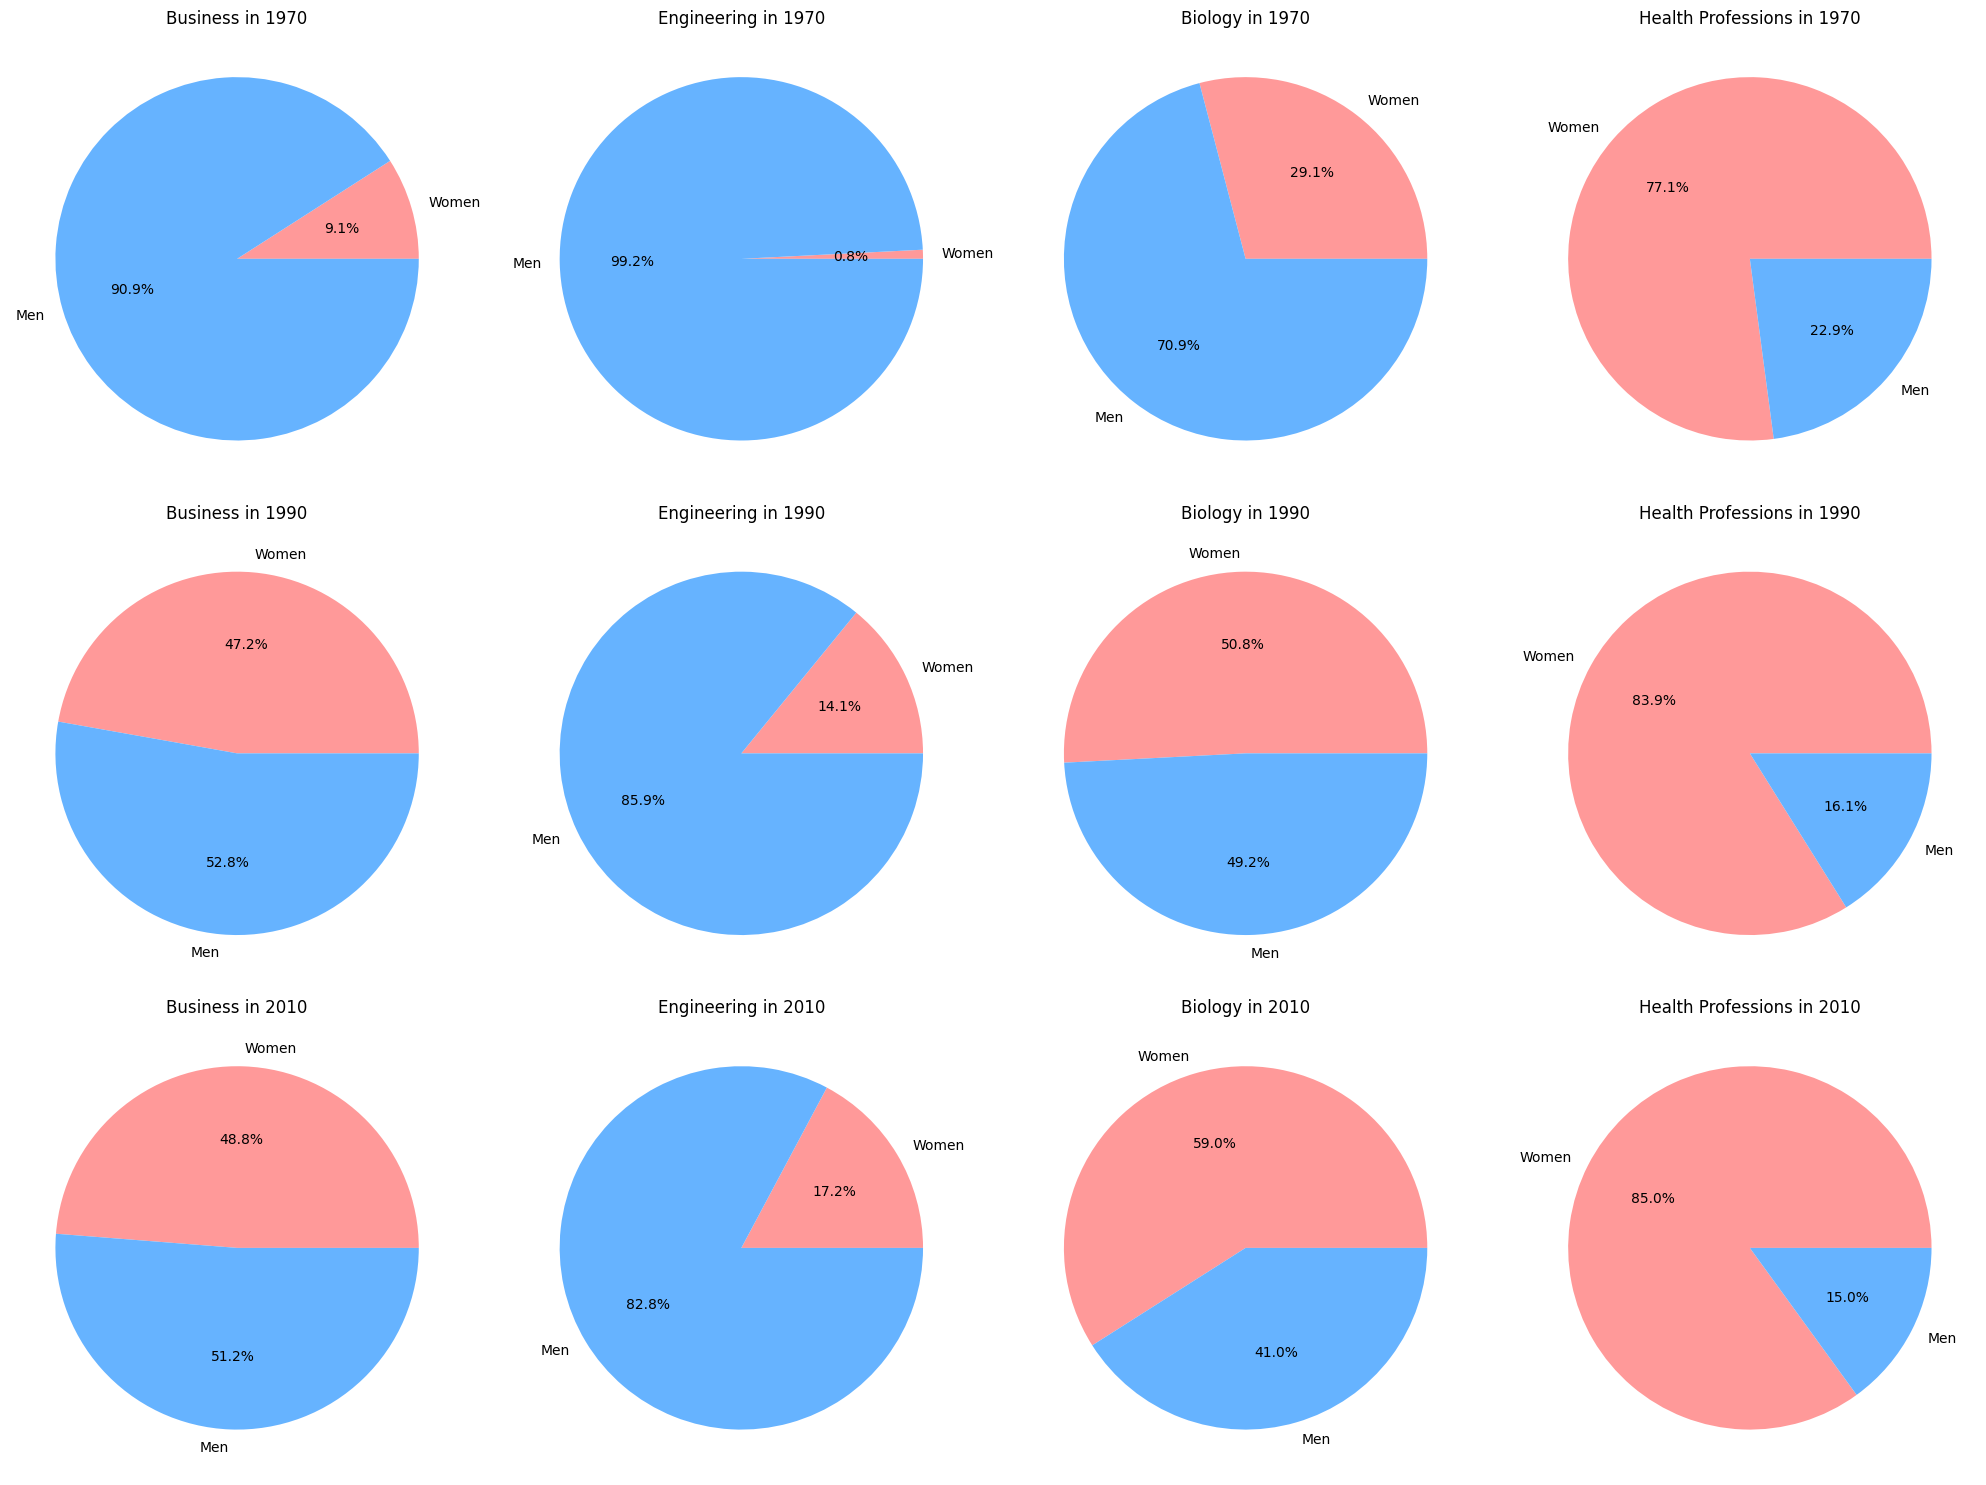

In [17]:
# Small multiples and pie charts to compare gender ratios of selected majors in 1970, 1990, and 2010
selected_majors = ['Business', 'Engineering', 'Biology', 'Health Professions']
years = [1970, 1990, 2010]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, year in enumerate(years):
    for j, major in enumerate(selected_majors):
        data = degree_gender_ratio[degree_gender_ratio['Year'] == year][major].values[0]
        axes[i, j].pie([data, 100 - data], labels=['Women', 'Men'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
        axes[i, j].set_title(f'{major} in {year}')

fig.tight_layout()
plt.show()